# HW02: Practice with logistic regression and decision tree

Sean Wells smwells3

## Hello Students:

- Start by downloading HW02.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW02.ipynb to Canvas's HW02.ipynb assignment
  - HW02.html to Canvas's HW02.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, tree
from sklearn.tree import DecisionTreeClassifier

# 1. Logistic regression

# 1a. Make a logistic regression model
relating the probability an iris has Species='virginica' to its 'Petal.Length'
and classifying irises as 'virginica' or not 'virginica' (i.e. 'versicolor').
- Read [http://www.stat.wisc.edu/~jgillett/451/data/iris.csv](http://www.stat.wisc.edu/~jgillett/451/data/iris.csv) into a DataFrame.
- Make a second data frame that excludes the 'setosa' rows (leaving the 'virginica' and 'versicolor' rows) and includes only the Petal.Length and Species columns.
- Train the model using $X=$ petal length and $y=$ whether the Species is 'virginica'.
  (I used "y = (df['Species'] == 'virginica').to_numpy().astype(int)",
  which sets y to zeros and ones.)
- Report its accuracy on the training data.
- Report the estimated P(Species=virginica | Petal.Length=5).
- Report the predicited Species for Petal.Length=5.
- Make a plot showing:
  - the data points
  - the estimated logistic curve
  - and what I have called the "sample proportion" of y == 1 at each unique Petal.Length value
  - a legend and title and other labels necessary to make the plot easy to read

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
irissep = iris[["Petal.Length", "Species"]].loc[iris["Species"] != "setosa"]
X = irissep["Petal.Length"].to_numpy().reshape(-1,1)
y = (irissep["Species"] == "virginica").to_numpy().astype(int)

In [4]:
model = linear_model.LogisticRegression(C=1000)
model.fit(X=X, y=y)
print(f"The training accuracy of the model is {model.score(X,y):.3}.")

The training accuracy of the model is 0.93.


In [5]:
print(f"Our model predicts that a flower with a petal length of 5 has roughly a {(model.predict_proba([[5]])[:,1][0]*100):.3}% chance of being of the virginica species.")

Our model predicts that a flower with a petal length of 5 has roughly a 77.3% chance of being of the virginica species.


In [6]:
print(model.predict([[5]]))
print("Our model classified a flower with a petal length of 5 as virginica.")

[1]
Our model classified a flower with a petal length of 5 as virginica.


Text(0, 0.5, 'proportion')

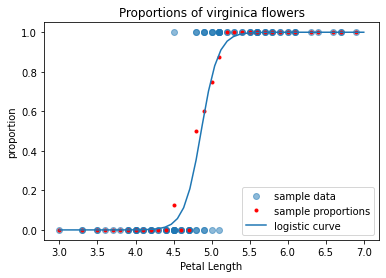

In [7]:
#plot data
plt.scatter(X, y,label='sample data', alpha=0.5)

#plot sample proportions
uni = irissep["Petal.Length"].unique()
prop = list()
for val in uni:
    unidf = irissep.loc[irissep["Petal.Length"] == val]
    prop.append(sum(unidf["Species"] == "virginica") / len(unidf))
plt.plot(uni, prop, '.', color='red',
         label='sample proportions', alpha=1)

#plot model curve
xplot = np.linspace(start=3, stop=7)
yplot = 1 / (1 + np.exp(-(model.coef_[0][0] * xplot + model.intercept_[0])))
plt.plot(xplot, yplot, label='logistic curve', alpha=1)

#clean up plot
plt.legend()
plt.title('Proportions of virginica flowers')
plt.xlabel('Petal Length')
plt.ylabel('proportion')

## 1b. Do some work with logistic regression by hand.
Consider the logistic regression model, $P(y
_i = 1) = \frac{1}{1 + e^{-(\mathbf{w x} + b)}}\,.$

Logistic regression is named after the log-odds of success, $\ln
  \frac{p}{1 - p}$, where $p = P(y_i = 1)$. Show that this log-odds
  equals $\mathbf{w x} + b$. (That is, start with $\ln
  \frac{p}{1 - p}$ and connect it in a series of equalities to $\mathbf{w x} + b$.)
  

#### ... your Latex math in a Markdown cell here ...

$\begin{align*} % In this Latex context, "&" separates columns and "\\" ends a line.
   \ln \frac{p}{1 - p} & = \ln \frac{\frac{1}{1+e^{-\mathbf{w x} + b}}}{1 - \frac{1}{1+e^{-\mathbf{w x} + b}}}\\
    & = \ln \frac{1}{e^{b-\mathbf{w x}}}\\
    & = -\ln e^{b-\mathbf{w x}}\\
    & = -(b-\mathbf{w x})\\
    & = \mathbf{w x} + b\\
 \end{align*}
$

### 1c. Do some more work with logistic regression by hand.

I ran some Python/scikit-learn code to make the model pictured here: ![](toyLogistic.png)

From the image and without the help of running code, match each code line from the top list with its output from the bottom list.

1. `model.intercept_`
2. `model.coef_`
3. `model.predict(X)`
4. `model.predict_proba(X)[:, 1]`

A. `array([0, 0, 0, 1])`,
B. `array([0.003, 0.5, 0.5, 0.997])`,
C. `array([5.832])`,
D. `array([0.])`

1: D, 2: C, 3: A, 4: B

# 2. Decision tree

## 2a. Make a decision tree model on a Titanic data set.
Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv](http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv).

These data are described at [https://www.kaggle.com/competitions/titanic/data](https://www.kaggle.com/competitions/titanic/data) (click on the small down-arrow to see the "Data Dictionary"), which is where they are from.

- Retain only the Survived, Pclass, Sex, and Age columns.
- Display the  first seven rows (passengers).
  Notice that the Age column includes NaN, indicating a missing value.
- Drop rows with missing data via `df.dropna()`. Display your data frame's shape before
  and after dropping rows. (It should be (714, 4) after dropping rows.)
- Add a column called 'Female' that indicates whether a passenger is Female. You can make this column via `df.Sex == 'female'`. This gives bool values True and False, which are interpreted as 1 and 0 when used in an arithmetic context.
- Train a decision tree with `max_depth=None` to decided whether a passenger
  `Survived` from the other three columns. Report its accuracy (with 3 decimal places)
  on training data along with the tree's depth (which is available in `clf.tree_.max_depth`).
- Train another tree with `max_depth=2`. Report its accuracy (with 3 decimal places).
  Use `tree.plot_tree()` to display it, including feature_names to make the tree easy to read.

In [8]:
titanic = pd.read_csv("kaggle_titanic_train.csv")
titanic = titanic[["Survived", "Pclass", "Sex", "Age"]]

In [9]:
display(titanic.iloc[0:7])

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
5,0,3,male,NaN
6,0,1,male,54.0


In [10]:
print(f"The shape of the 'full' titanic dataset is {titanic.shape}.")
titanic = titanic.dropna()
print(f"The shape of the titanic dataset with dropped rows of NA values is {titanic.shape}.")

The shape of the 'full' titanic dataset is (891, 4).
The shape of the titanic dataset with dropped rows of NA values is (714, 4).


In [11]:
titanic["Female"] = titanic.Sex == "female"
X = titanic[["Pclass", "Age", "Female"]]
y = titanic["Survived"]
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
clf.fit(X, y)
print(f"The decision tree model with no depth restriction has a score of {clf.score(X,y):.3} and a max depth of {clf.tree_.max_depth}.")

The decision tree model with no depth restriction has a score of 0.896 and a max depth of 15.


In [12]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X, y)
print(f"The decision tree model with a depth restriction of 2 has a score of {clf.score(X,y):.3}.")

The decision tree model with a depth restriction of 2 has a score of 0.791.


[Text(0.5, 0.8333333333333334, 'Female <= 0.5\nentropy = 0.974\nsamples = 714\nvalue = [424, 290]'),
 Text(0.25, 0.5, 'Pclass <= 1.5\nentropy = 0.732\nsamples = 453\nvalue = [360, 93]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.969\nsamples = 101\nvalue = [61, 40]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.611\nsamples = 352\nvalue = [299, 53]'),
 Text(0.75, 0.5, 'Pclass <= 2.5\nentropy = 0.804\nsamples = 261\nvalue = [64, 197]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.314\nsamples = 159\nvalue = [9, 150]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.996\nsamples = 102\nvalue = [55, 47]')]

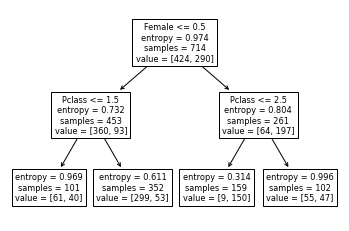

In [13]:
feature_names = ["Pclass", "Age", "Female"]
tree.plot_tree(clf, feature_names=feature_names)

## 2b. Which features are used in the (max_depth=2) decision-making? Answer in a markdown cell.

The decision tree model with a max depth of 2 only used sex and passenger class in the decision making process.

 ## 2c. What proportion of females survived? What proportion of males survived?
 Answer in two sentences via print(), with each proportion rounded to three decimal places.
 
 Hint: There are many ways to do this. One quick way is to find the average of the `Female`
 column for each subset.

In [14]:
f = titanic[titanic["Female"] == True]
fprop = sum(f["Survived"]) / len(f)
m = titanic[titanic["Female"] == False]
mprop = sum(m["Survived"]) / len(m)
print(f"The proportion of females that survived was around {fprop:.3}. The proportion of males that survived was around {mprop:.3}.")

The proportion of females that survived was around 0.755. The proportion of males that survived was around 0.205.


## 2d. Do some decision tree calculations by hand.
Consider a decision tree node containing the following set of examples $S =
\{(\mathbf{x}, y)\}$ where $\mathbf{x} = (x_1, x_2)$:

((4, 9), 1)

((2, 6), 0)

((5, 7), 0)

((3, 8), 1)

Find the entropy of $S$.

The entropy of S is p(0) * -log2(p(0)) + p(1) * -log2(p(1)) which equals 1.0.

 ## 2e. Do some more decision tree calculations by hand.
Find a (feature, threshold) pair that yields the best split for this node.

Using feature x2 and threshold 7: S_ = ((2,6) 0), ((5,7) 0) and S+ = ((3,8) 1), ((4,9) 1) which both yield a weighted entropy = 0.0 and thus is the best split.